In [1]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading a data 
data=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\university rank.csv")

In [3]:
data

,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
0,1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96.0
1,2,Stanford University,United States,93.4,91.9,100.0,83.5,91.8,98.2
2,3,Harvard University,United States,92.4,95.2,69.8,82.1,93.4,95.0
3,4,"University of California, Berkeley",United States,91.9,95.2,90.6,83.5,92.7,91.1
4,5,University of Cambridge,United Kingdom,91.7,86.6,76.7,95.4,94.6,93.8
...,...,...,...,...,...,...,...,...,...
905,905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
906,906,Warsaw University of Life Sciences – SGGW,Poland,12.6–22.9,33.7,18.1,38.2,9.2,12.8
907,907,Warsaw University of Technology,Poland,12.6–22.9,28.1,61.0,22.7,12.7,15.3
908,908,University of West Attica,Greece,12.6–22.9,46.1,31.0,23.1,8.8,8.8


In [21]:
data.shape

(910, 9)

In [4]:
# Exploring the data
#(1) getting the list of columns
data.columns

Index(['rank', 'ranking-institution-title', 'location', 'Overall scores',
       'Research Quality Score', 'Industry Score', 'International Outlook',
       'Research Environment Score', 'Teaching Score'],
      dtype='object')

In [5]:
# counting the number of columns in a dataset.

data.columns.nunique()

9

In [6]:
#(2) checking for information of the given data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        910 non-null    int64  
 1   ranking-institution-title   910 non-null    object 
 2   location                    898 non-null    object 
 3   Overall scores              910 non-null    object 
 4   Research Quality Score      910 non-null    float64
 5   Industry Score              910 non-null    float64
 6   International Outlook       910 non-null    float64
 7   Research Environment Score  910 non-null    float64
 8   Teaching Score              910 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 64.1+ KB


* We get to know that there are 3 different types of datatype in a dataset , such as int64,object and float64
* location is the only column in a dataset having null values in it.

In [7]:
data.isnull().sum()

rank                           0
ranking-institution-title      0
location                      12
Overall scores                 0
Research Quality Score         0
Industry Score                 0
International Outlook          0
Research Environment Score     0
Teaching Score                 0
dtype: int64

* There are total 12 null values in a location column. Which have to be replaced by its mode values or by keeping is nothing.

In [22]:
# Describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,910.0,454.591209,262.697117,1.0,227.250,454.50,681.750,909.0
Research Quality Score,910.0,61.655495,18.907380,13.3,47.450,64.30,77.000,98.6
Industry Score,910.0,52.941429,23.577805,2.2,33.125,54.85,68.500,100.0
International Outlook,910.0,57.753626,21.926835,18.4,39.600,54.65,76.175,99.0
Research Environment Score,910.0,24.548022,17.101846,6.6,13.000,19.20,28.900,97.4
Teaching Score,910.0,25.253846,15.439527,6.7,15.800,20.20,28.975,98.2


In [8]:
# sample of data
data.sample(30)

,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
109,109,University of Glasgow,United Kingdom,52.3–55.6,71.3,58.3,93.8,40.0,41.9
890,890,Southern Federal University,NaN,12.6–22.9,29.9,18.1,40.2,9.2,25.4
331,331,Hebrew University of Jerusalem,Israel,37.4–41.6,53.1,67.4,43.8,30.1,29.8
905,905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
530,530,Financial University under the Government of t...,NaN,31.3–34.1,38.0,46.2,28.7,25.7,32.9
14,15,National University of Singapore,Singapore,85.7,79.7,97.9,80.4,95.9,79.9
847,847,University of La Laguna,Spain,12.6–22.9,35.6,34.6,29.6,11.9,18.8
725,725,Örebro University,Sweden,23.0–31.2,46.0,18.9,34.3,16.2,16.0
763,763,SUNY Binghamton University,United States,23.0–31.2,48.1,59.1,54.7,13.4,22.5
101,101,Abu Dhabi University,United Arab Emirates,52.3–55.6,92.8,36.3,95.2,25.8,40.8


### Checking null values and fixing it.

In [9]:
# checking for location column
data[data["location"].isnull()]

,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
61,62,Lomonosov Moscow State University,NaN,61.4,43.3,76.6,67.7,57.5,76.5
86,87,HSE University,NaN,58.1,54.7,69.7,49.2,59.0,61.2
173,173,Ural Federal University,NaN,47.4–49.2,76.3,50.0,78.5,33.0,29.1
190,190,Peter the Great St Petersburg Polytechnic Univ...,NaN,46.2–47.3,72.1,24.2,64.6,28.3,40.9
383,383,South Ural State University,NaN,37.4–41.6,91.3,19.3,60.2,11.4,17.8
530,530,Financial University under the Government of t...,NaN,31.3–34.1,38.0,46.2,28.7,25.7,32.9
570,570,Plekhanov Russian University of Economics,NaN,31.3–34.1,35.1,34.3,51.7,18.8,34.8
580,580,RUDN University,NaN,31.3–34.1,50.6,19.5,65.5,16.6,25.6
679,679,ITMO University,NaN,23.0–31.2,56.3,41.8,43.7,17.9,17.1
686,686,Kazan Federal University,NaN,23.0–31.2,42.0,22.2,59.4,10.8,30.8


In [10]:
# describing the location column
data["location"].describe()

count               898
unique               77
top       United States
freq                143
Name: location, dtype: object

In [11]:
# getting the mode value for location column
a=data['location'].mode()[0]

In [12]:
a

'United States'

In [13]:
# replacing the NaN values of location column with its mode value.
data["location"].fillna(a,inplace=True)

In [14]:
data

,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
0,1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96.0
1,2,Stanford University,United States,93.4,91.9,100.0,83.5,91.8,98.2
2,3,Harvard University,United States,92.4,95.2,69.8,82.1,93.4,95.0
3,4,"University of California, Berkeley",United States,91.9,95.2,90.6,83.5,92.7,91.1
4,5,University of Cambridge,United Kingdom,91.7,86.6,76.7,95.4,94.6,93.8
...,...,...,...,...,...,...,...,...,...
905,905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
906,906,Warsaw University of Life Sciences – SGGW,Poland,12.6–22.9,33.7,18.1,38.2,9.2,12.8
907,907,Warsaw University of Technology,Poland,12.6–22.9,28.1,61.0,22.7,12.7,15.3
908,908,University of West Attica,Greece,12.6–22.9,46.1,31.0,23.1,8.8,8.8


In [15]:
data.loc[60:]


,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
60,61,University of Illinois at Urbana-Champaign,United States,61.5,74.5,79.2,67.8,57.0,51.4
61,62,Lomonosov Moscow State University,United States,61.4,43.3,76.6,67.7,57.5,76.5
62,63,"University of California, Davis",United States,61.2,84.3,76.2,84.6,52.0,42.9
63,64,King’s College London,United Kingdom,61.1,76.0,31.1,93.9,53.7,50.7
64,65,Boston University,United States,60.9,91.3,63.5,81.4,44.1,47.0
...,...,...,...,...,...,...,...,...,...
905,905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
906,906,Warsaw University of Life Sciences – SGGW,Poland,12.6–22.9,33.7,18.1,38.2,9.2,12.8
907,907,Warsaw University of Technology,Poland,12.6–22.9,28.1,61.0,22.7,12.7,15.3
908,908,University of West Attica,Greece,12.6–22.9,46.1,31.0,23.1,8.8,8.8


In [16]:
# checking for the null values again .
data.isnull().sum()

rank                          0
ranking-institution-title     0
location                      0
Overall scores                0
Research Quality Score        0
Industry Score                0
International Outlook         0
Research Environment Score    0
Teaching Score                0
dtype: int64

* There is no NaN values in the data.
* Because all the NaN values of location column is filled with its mode value.

### For Industry Score column

In [17]:
# descrbing the nature of it.
data["Industry Score"].describe().T

count    910.000000
mean      52.941429
std       23.577805
min        2.200000
25%       33.125000
50%       54.850000
75%       68.500000
max      100.000000
Name: Industry Score, dtype: float64

<Axes: xlabel='rank', ylabel='Industry Score'>

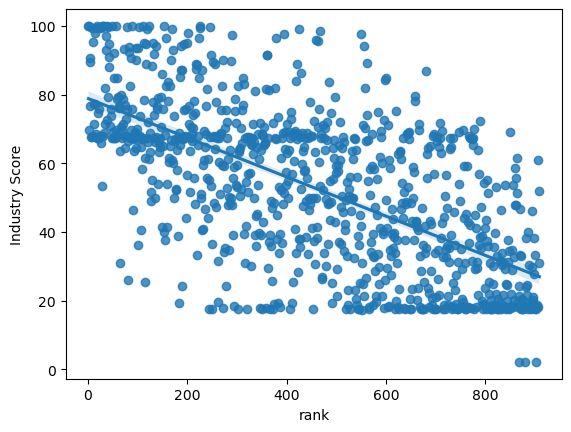

In [18]:
# As we have 3 target columns in our dataset .
sb.regplot(x="rank",y="Industry Score",data=data)

* The relation between the rank and Industry Score shows that as  the rank increases , the industry score gets decreases.
* With the help of the regression line we can observe that there is a negative relation between them.

<Axes: xlabel='Research Quality Score', ylabel='Industry Score'>

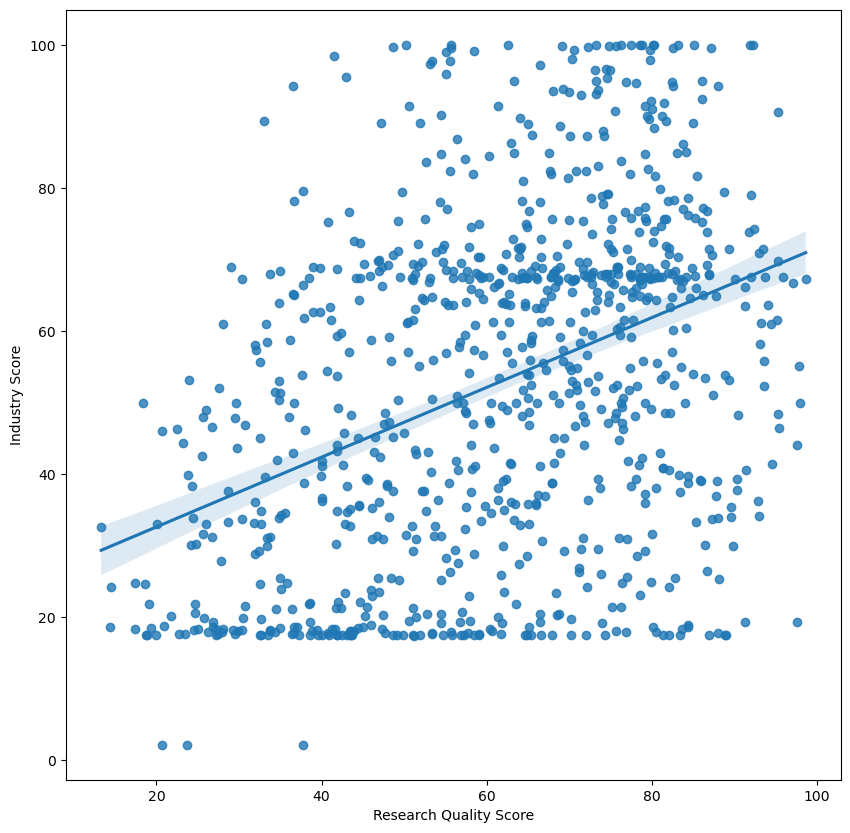

In [33]:
# checking relational between Research Quality Score
plt.figure(figsize=(10,10))
sb.regplot(x='Research Quality Score',y="Industry Score",data=data)

* From the above observation , the relation between them is positive.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


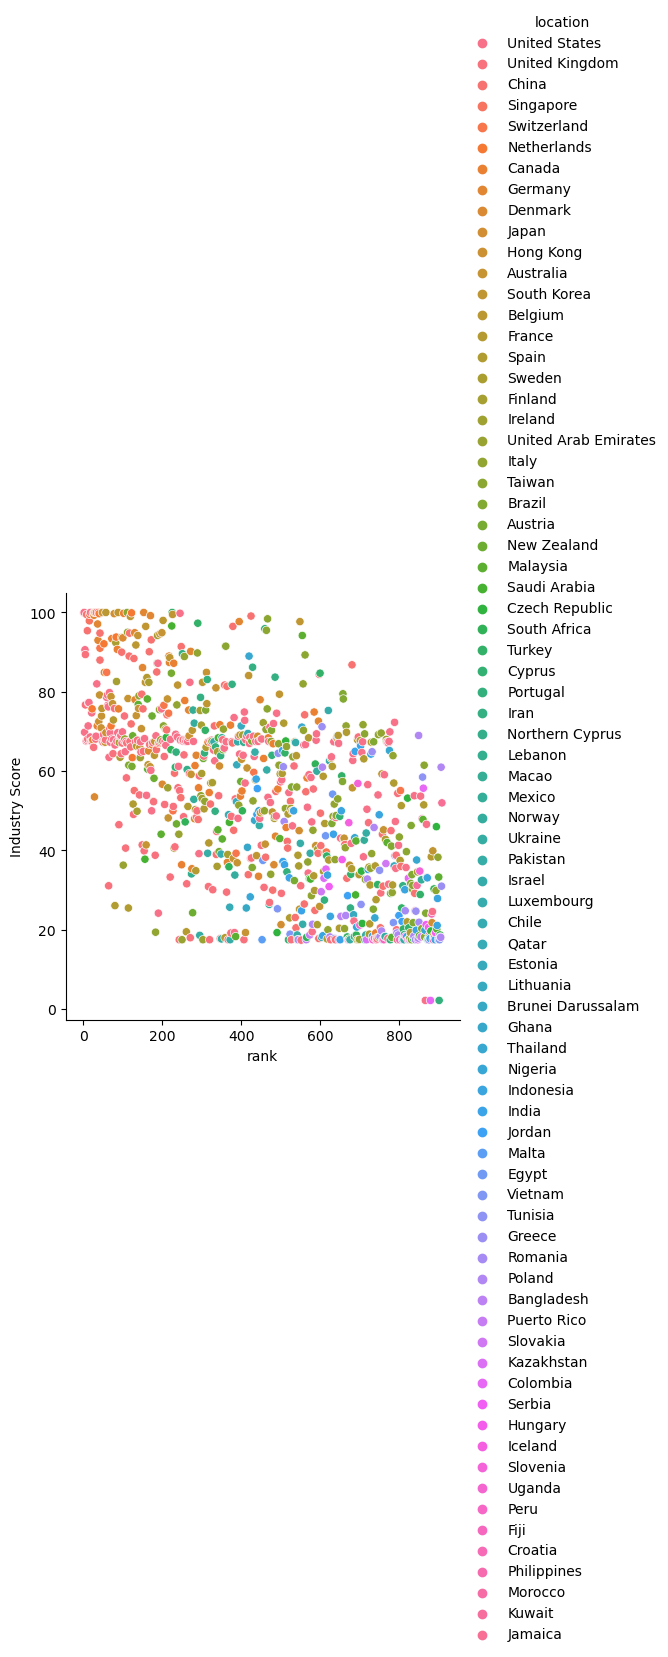

In [37]:
sb.relplot(x="rank",y="Industry Score",hue="location",data=data)

<Axes: ylabel='Industry Score'>

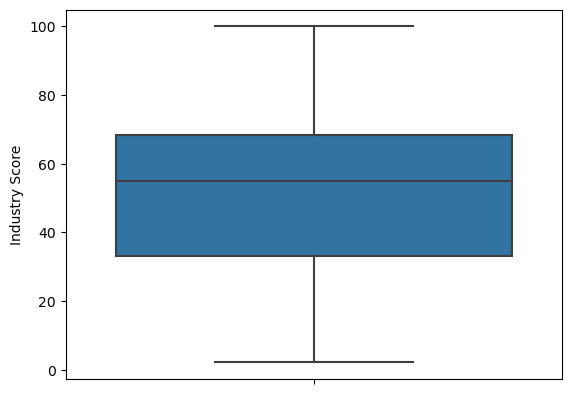

In [61]:
sb.boxplot(y="Industry Score",data=data)

* The mean value of score is 52.9.
* There is no outlier present in it.

<Axes: xlabel='Industry Score', ylabel='Count'>

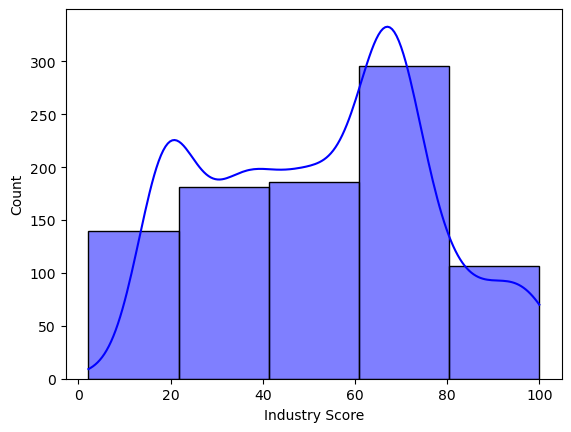

In [74]:
sb.histplot(x="Industry Score",data=data,color="blue",kde=True,bins=5)

* The score between 61-81 has the maximum numbers of count.
* The score between 41-61 has the second maximum numbers of count.
* The score between 22-41 has the third maximum numbers of count.
* The score between 2-22 has the second minimum numbers of count.
* The score between 81-100 has the minimum numbers of count.

<Axes: xlabel='Industry Score', ylabel='Density'>

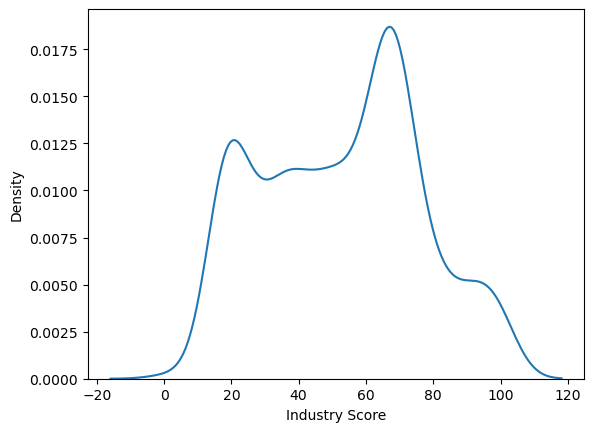

In [75]:
#plotting the curve plot of the Industry Score
sb.kdeplot(x="Industry Score",data=data)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


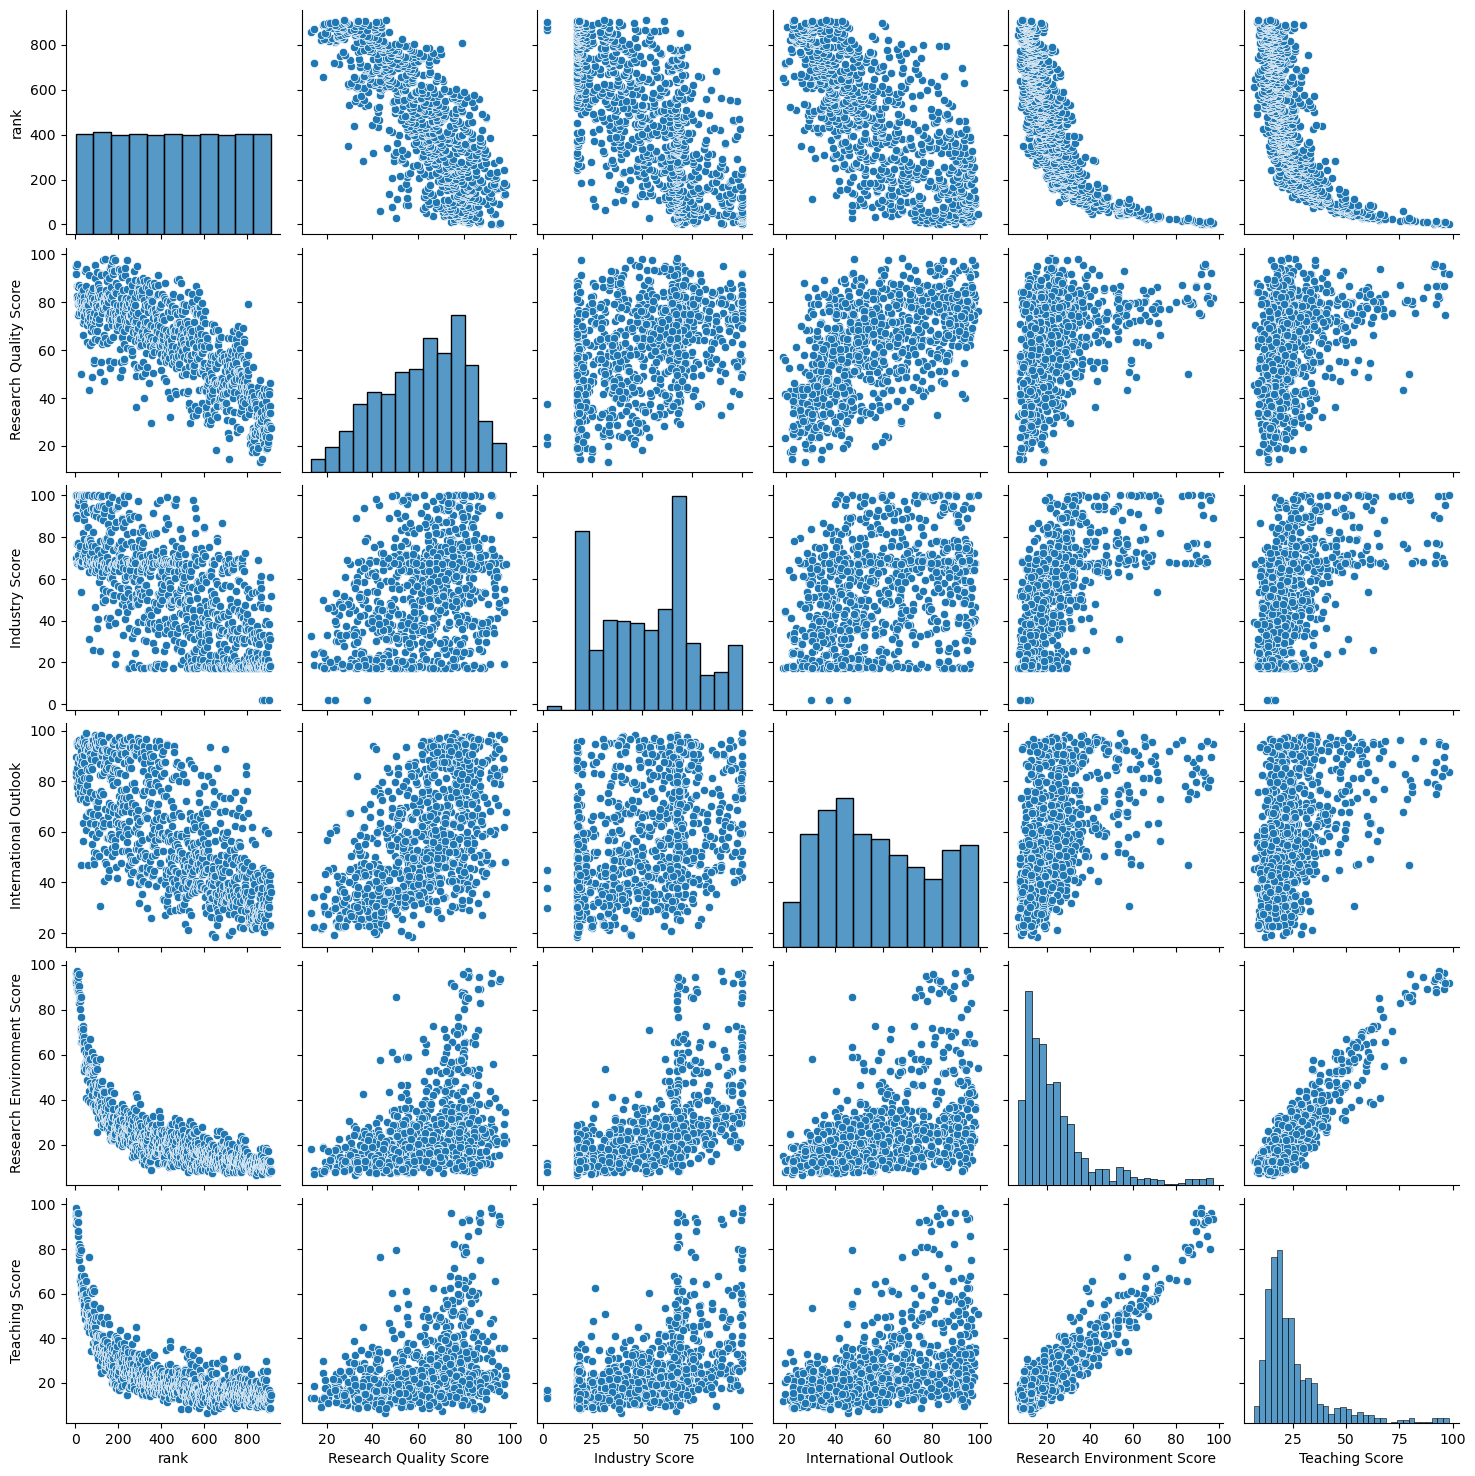

In [76]:
#plotting the for checking the relation of others with Industry Score column

sb.pairplot(data)

In [79]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

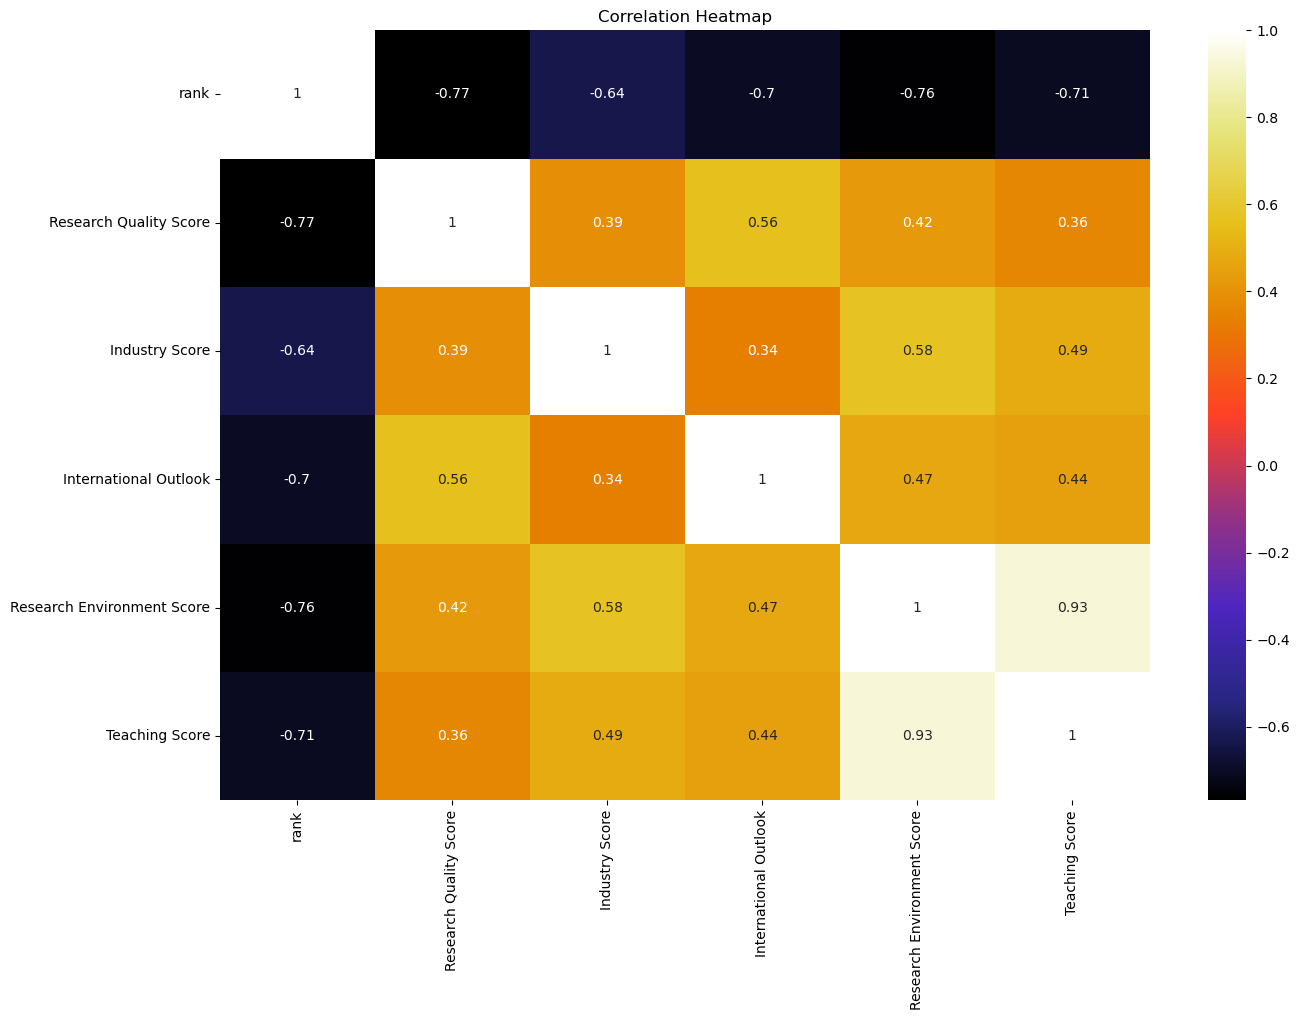

In [81]:
# To get this more clear we use heatmap

plt.figure(figsize=(15, 10))
sb.heatmap(data[numeric_columns].corr(), cmap="CMRmap", annot=True)
plt.title('Correlation Heatmap')
plt.show()